#[Staddon 1993](https://psycnet.apa.org/record/1995-20273-001)
$$V_{1}(t+1) = a_1V_{1}(t) + (1-a_1)X(t) $$

$$V_S(t) = X(t)-V_1(t+1)$$

$$V_{0}(t)= \left\{\begin{matrix}
V_S(t) \text{  if   } V_S(t)>\theta_1 \\
0  \text{  otherwise }
\end{matrix}\right.$$

$$V_{2}(t+1) = a_2V_{2}(t) + (1-a_2)V_{0}(t) $$

$$V_{S2}(t) = V_{0}(t)-V_2(t+1)$$

$$V_{02}(t)= \left\{\begin{matrix}
V_{S2}(t) \text{  if   } V_{S2}(t)>\theta_2 \\
0  \text{  otherwise }
\end{matrix}\right.$$

$$t=0,1,2,...$$

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import linalg as LA
from scipy.signal import find_peaks
from calc_util import sliding_maxnorm_ht


# color settings
cmap = matplotlib.cm.get_cmap('Blues')
colors = [cmap(0.99), cmap(0.8), cmap(0.6), cmap(0.4), cmap(0.2)]

In [2]:
[int(i%3 == 0) for i in range(10) ]

[1, 0, 0, 1, 0, 0, 1, 0, 0, 1]

In [3]:
class OFF:
    def __init__(self, a=0.5, dt_int=1.0, rate_input = 1, tita= 0.0, recovery=0, recovery_step = 1, a_2=0.95, tita_2=0.0):

        self.a = a
        self.rate_input = int(rate_input)
        self.tita = tita
        self.recovery_step = int(recovery_step)
        self.a_2 = a_2
        self.tita_2 = tita_2
        self.recovery = int(recovery)


        self.tMIN = 0.0
        self.tMAX = 100.0 # in secs #as in Staddon paper
        self.dt = dt_int # in secs
        self.tvec = np.arange(self.tMIN, self.tMAX, self.dt)

        input = [int(i%self.rate_input == 0) for i in range(len(self.tvec)) ]
        self.input = np.array(input)
        self.input[int(len(self.input)/2 +1):] = 0.0 #half of the input vector is set to 0 for testing recovery
        if self.recovery:
            self.timestep = int(len(self.input)/2 + self.recovery_step)
            self.input[self.timestep] = 1.0 #test peak at half habituation-trajectory + recovery_step
            #print(self.input) 

        self.V_i = None
        self.V_0 = None
        self.V_2 = None
        self.V_02 = None

    def run(self, y0=[0.0, 0.0]):
        """
        Runs the model.
        """
        lent = len(self.tvec)
        # allocate space for result
        self.V_i = np.zeros(lent)
        self.V_0 = np.zeros(lent)
        self.V_2 = np.zeros(lent)
        self.V_02 = np.zeros(lent)
        self.V_i[0] = y0[0]
        self.V_2[0] = y0[1]
        for n in range(lent-1):
            self.V_i[n+1] = self.a*self.V_i[n] + (1-self.a)*self.input[n]
            #value = (self.input[n] - self.V_i[n])
            value = (self.input[n] - self.V_i[n+1])
            if ((value-self.tita)>0):
                self.V_0[n] = value
            else:
                self.V_0[n] = 0.0
            self.V_2[n+1] = self.a_2*self.V_2[n] + (1-self.a_2)*self.V_0[n]
            #value_2 = (self.V_0[n] - self.V_2[n])
            value_2 = (self.V_0[n] - self.V_2[n+1])
            if ((value_2-self.tita_2)>0):
                self.V_02[n] = value_2
            else:
                self.V_02[n] = 0.0

In [4]:
from scipy.signal import find_peaks
model_1 = OFF(rate_input = 1, recovery_step = 40) # recovery en el tiempo 50 + 40
model_1.run()
peaks1, _ = find_peaks( model_1.V_02)
peaks1 = np.insert(peaks1, 0, 0, axis=0) # agrega el t=0 a los picos


model_2 = OFF(rate_input = 2, recovery_step = 40) # un tiempo con input, un tiempo sin input, y asi sucesivamente
model_2.run()
peaks2, _ = find_peaks( model_2.V_02)
peaks2 = np.insert(peaks2, 0, 0, axis=0)

model_3 = OFF(rate_input = 3, recovery_step = 40)
model_3.run()
peaks3, _ = find_peaks( model_3.V_02)
peaks3 = np.insert(peaks3, 0, 0, axis=0)

model_4 = OFF(rate_input = 4, recovery_step = 40)
model_4.run()
peaks4, _ = find_peaks( model_4.V_02)
peaks4 = np.insert(peaks4, 0, 0, axis=0)

model_5 = OFF(rate_input = 5, recovery_step = 40)
model_5.run()
peaks5, _ = find_peaks( model_5.V_02)
peaks5 = np.insert(peaks5, 0, 0, axis=0)

#[Staddon 1993](https://psycnet.apa.org/record/1995-20273-001)
$$M_{1}(t+1) = (1-a_1)I(t) +  a_1M_{1}(t) $$

$$R_{S1}(t) = I(t)-M_1(t+1)$$

$$R_{1}(t)= \left\{\begin{matrix}
R_{S1}(t) \text{  if   } R_{S1}(t)>\theta_1 \\
0  \text{  otherwise }
\end{matrix}\right.$$

$$M_{2}(t+1) = (1-a_2)R_{1}(t) + a_2M_{2}(t) $$

$$R_{S2}(t) = R_{1}(t)-M_2(t+1)$$

$$R_{2}(t)= \left\{\begin{matrix}
R_{S2}(t) \text{  if   } R_{S2}(t)>\theta_2 \\
0  \text{  otherwise }
\end{matrix}\right.$$

$$t=0,1,2,...$$

# **Habituation time (ht)**

$$d_i = \frac{p_i-p_{i+1}}{p_i}<0.01$$

Here, $p_j$ denotes the jth peak and $d_j$ is the relative difference between peak $j$ and $j + 1$.
Habituation time is then defined as the number of applied stimuli until the relative differences fall below a fixed threshold. By default this threshold was set to 0.01. It is worth mentioning that habituation time is measured in number of stimuli and not in units of time.

In [5]:
diff_1=[]
diff_2=[]
diff_3=[]
diff_4=[]
diff_5=[]

for i in range(5):
    diff_1.append((model_1.V_02[i] - model_1.V_02[i+1])/model_1.V_02[i]) # falla porque model_1.V_02[i]=0 a partir de i=4

for i in range(len(model_2.V_02[peaks2])-1):
    diff_2.append((model_2.V_02[peaks2][i] - model_2.V_02[peaks2][i+1])/model_2.V_02[peaks2][i])

for i in range(len(model_3.V_02[peaks3])-1):
    diff_3.append((model_3.V_02[peaks3][i] - model_3.V_02[peaks3][i+1])/model_3.V_02[peaks3][i])


for i in range(len(model_4.V_02[peaks4])-1):
    diff_4.append((model_4.V_02[peaks4][i] - model_4.V_02[peaks4][i+1])/model_4.V_02[peaks4][i])

for i in range(len(model_5.V_02[peaks5])-1):
    diff_5.append((model_5.V_02[peaks5][i] - model_5.V_02[peaks5][i+1])/model_5.V_02[peaks5][i])

/var/folders/6c/k2rrfb9x7nqbhbcjqtwq2gy40000gn/T/ipykernel_24345/201136686.py:8: RuntimeWarning: invalid value encountered in double_scalars
  diff_1.append((model_1.V_02[i] - model_1.V_02[i+1])/model_1.V_02[i]) # falla porque model_1.V_02[i]=0 a partir de i=4


In [15]:
diffs=[diff_1, diff_2, diff_3, diff_4, diff_5]
for i in range(5):
    print(i,end=",")
    hab=np.where(np.array(diffs[i])<0.01)
    print(hab)

0,(array([], dtype=int64),)
1,(array([20, 21, 22, 23, 24]),)
2,(array([12, 13, 14, 15]),)
3,(array([ 9, 10, 11]),)
4,(array([7, 8, 9]),)


In [6]:
timestep1=[]
envelope1=[]
envelope1_M1=[]
envelope1_M2=[]
for recovery in range(2,40):
    model_10 = OFF(rate_input = 1, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope1.append(model_10.V_02[model_10.timestep])
    envelope1_M1.append(model_10.V_i[model_10.timestep])
    envelope1_M2.append(model_10.V_2[model_10.timestep])
    timestep1.append(model_10.timestep)

timestep2=[]
envelope2=[]
envelope2_M1=[]
envelope2_M2=[]
for recovery in range(2,40):
    model_10 = OFF(rate_input = 2, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope2.append(model_10.V_02[model_10.timestep ])
    envelope2_M1.append(model_10.V_i[model_10.timestep])
    envelope2_M2.append(model_10.V_2[model_10.timestep])
    timestep2.append(model_10.timestep)

timestep3=[]
envelope3=[]
envelope3_M1=[]
envelope3_M2=[]
for recovery in range(0,40):
    model_10 = OFF(rate_input = 3, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope3.append(model_10.V_02[model_10.timestep ])
    envelope3_M1.append(model_10.V_i[model_10.timestep])
    envelope3_M2.append(model_10.V_2[model_10.timestep])
    timestep3.append(model_10.timestep)

timestep4=[]
envelope4=[]
envelope4_M1=[]
envelope4_M2=[]
for recovery in range(0,40):
    model_10 = OFF(rate_input = 4, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope4.append(model_10.V_02[model_10.timestep ])
    envelope4_M1.append(model_10.V_i[model_10.timestep])
    envelope4_M2.append(model_10.V_2[model_10.timestep])
    timestep4.append(model_10.timestep)

timestep5=[]
envelope5=[]
envelope5_M1=[]
envelope5_M2=[]
for recovery in range(2,40):
    model_10 = OFF(rate_input = 5, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope5.append(model_10.V_02[model_10.timestep])
    envelope5_M1.append(model_10.V_i[model_10.timestep])
    envelope5_M2.append(model_10.V_2[model_10.timestep])
    timestep5.append(model_10.timestep)

In [7]:
import matplotlib as mpl
mpl.rcParams["font.size"]=14

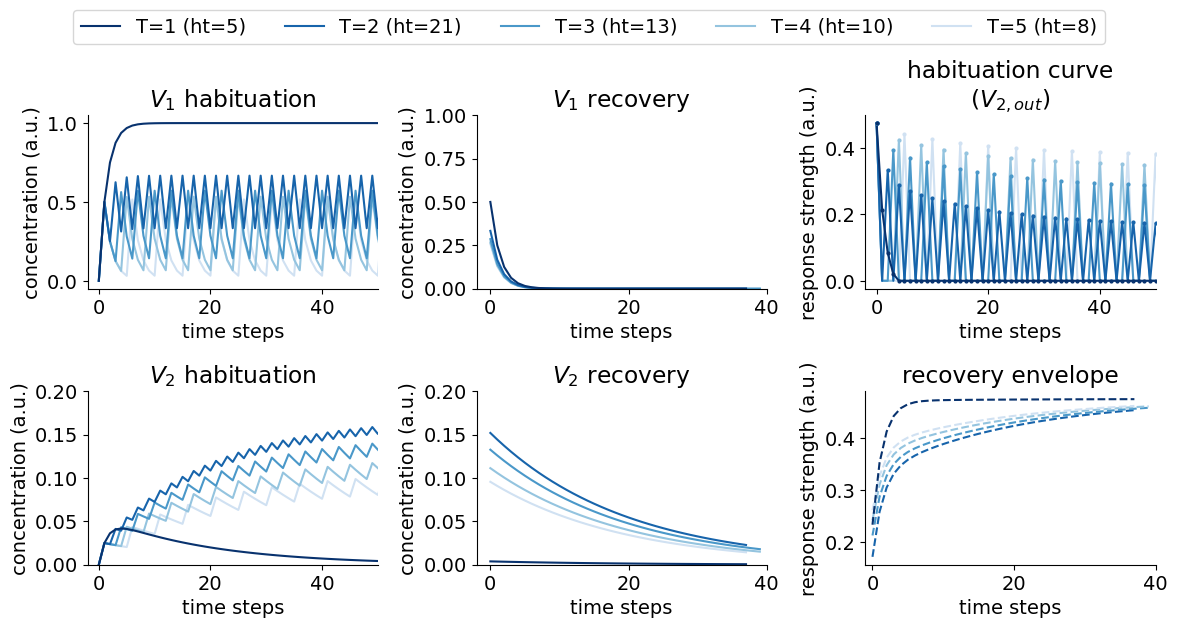

In [39]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 6))
ax=axes[0][0] # habituation M1
ax.plot(model_5.tvec, model_5.V_i, color=colors[4])
ax.plot(model_4.tvec, model_4.V_i, color=colors[3])
ax.plot(model_3.tvec, model_3.V_i, color=colors[2])
ax.plot(model_2.tvec, model_2.V_i, color=colors[1])
ax.plot(model_1.tvec[:], model_1.V_i[:], color=colors[0])
ax.set_title(r"$V_{1}$"+" habituation")
ax.set_xlabel("time steps")
ax.set_ylabel('concentration (a.u.)')
ax.set_xlim((-2,50))

ax=axes[0][1] # recovery M1
l5,=ax.plot( envelope5_M1, color=colors[4], label='T=5')
l4,=ax.plot( envelope4_M1, color=colors[3], label='T=4')
l3,=ax.plot( envelope3_M1, color=colors[2], label='T=3')
l2,=ax.plot( envelope2_M1, color=colors[1], label='T=2')
l1,=ax.plot( envelope1_M1, color=colors[0], label='T=1')
ax.set_title(r"$V_{1}$"+" recovery")
ax.set_xlabel("time steps")
ax.set_ylabel('concentration (a.u.)')
ax.set_xlim((-2,40))
ax.set_ylim(0,1)
#ax.legend()

ax=axes[1][0] # habituation M2
ax.plot(model_5.tvec, model_5.V_2, color=colors[4])
ax.plot(model_4.tvec, model_4.V_2, color=colors[3])
ax.plot(model_3.tvec, model_3.V_2, color=colors[2])
ax.plot(model_2.tvec, model_2.V_2, color=colors[1])
ax.plot(model_1.tvec[:], model_1.V_2[:], color=colors[0])
ax.set_title(r"$V_{2}$"+" habituation")
ax.set_xlabel("time steps")
ax.set_ylabel('concentration (a.u.)')
ax.set_xlim((-2,50))
ax.set_ylim(0,0.2)

ax=axes[1][1] # recovery M2
ax.plot( envelope5_M2, color=colors[4])
ax.plot( envelope4_M2, color=colors[3])
ax.plot( envelope3_M2, color=colors[2])
ax.plot( envelope2_M2, color=colors[1])
ax.plot( envelope1_M2, color=colors[0])
ax.set_title(r"$V_{2}$"+" recovery")
ax.set_xlabel("time steps")
ax.set_ylabel('concentration (a.u.)')
ax.set_xlim((-2,40))
ax.set_ylim(0,0.2)

ax=axes[0][2] # habituation response
ax.plot(model_5.tvec, model_5.V_02, color=colors[4])
ax.plot(model_4.tvec, model_4.V_02, color=colors[3])
ax.plot(model_3.tvec, model_3.V_02, color=colors[2])
ax.plot(model_2.tvec, model_2.V_02, color=colors[1])
ax.plot(model_1.tvec[:], model_1.V_02[:],color=colors[0])
ms=2
ax.plot(model_5.tvec[peaks5], model_5.V_02[peaks5], 'o', label= "T=5, ht=8", color=colors[4],ms=ms)
ax.plot(model_4.tvec[peaks4], model_4.V_02[peaks4], 'o', label= "T=4, ht=10", color=colors[3],ms=ms)
ax.plot(model_3.tvec[peaks3], model_3.V_02[peaks3], 'o', label= "T=3, ht=13", color=colors[2],ms=ms)
ax.plot(model_2.tvec[peaks2], model_2.V_02[peaks2], 'o', label= "T=2, ht=21", color=colors[1],ms=ms)
ax.plot(model_1.tvec[:], model_1.V_02[:], 'o', label= "T=1, ht=5", color=colors[0],ms=ms)
ax.set_ylabel(r"$V_{02}$")
ax.set_title('habituation curve\n($V_{2,out}$)')
ax.set_xlabel("time steps")
ax.set_ylabel('concentration (a.u.)')
#ax.legend()
ax.set_xlim((-2,50))

ax=axes[1][2] # recovery envelope
ax.plot( envelope2, '--', color=colors[1])
ax.plot( envelope3, '--', color=colors[2])
ax.plot( envelope4, '--', color=colors[3])
ax.plot( envelope5, '--', color=colors[4])
ax.plot( envelope1, '--', color=colors[0])
ax.set_xlim((-1, 40))
ax.set_xlabel("time steps")
ax.set_ylabel('concentration (a.u.)')
ax.set_title('recovery envelope')
for row in axes:
    for ax in row:
        ax.spines[['right', 'top']].set_visible(False)
ax=axes[0][2]
ax.set_ylabel("response strength (a.u.)")
ax=axes[1][2]
ax.set_ylabel("response strength (a.u.)")

plt.tight_layout()

fig.legend([l1,l2,l3,l4,l5],["T=1 (ht=5)","T=2 (ht=21)","T=3 (ht=13)","T=4 (ht=10)","T=5 (ht=8)"],
          loc="center",ncol=5,bbox_to_anchor=(0.5,1.02))
plt.savefig("staddon_1993.pdf", bbox_inches="tight")
plt.show()